<a href="https://colab.research.google.com/github/pateldeep7799/Cotton-Disease-Prediction-using-Deep-Learning/blob/main/Cotton_Diseases_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pateldeep7799","key":"94c27d11ac6edcaa43bfe87f42bdef5d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

 99% 147M/148M [00:02<00:00, 57.3MB/s]
100% 148M/148M [00:02<00:00, 61.4MB/s]


In [ ]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
!unzip /content/cotton-disease-dataset.zip

Archive:  /content/cotton-disease-dataset.zip
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (183)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (193)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (194)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (204)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (214)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (219)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (224)_iaip.jpg  

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Cotton Disease/train'
valid_path = '/content/Cotton Disease/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:

# useful for getting number of output classes
folders = glob('/content/Cotton Disease/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 40s 604ms/step - loss: 4.8374 - accuracy: 0.5703 - val_loss: 0.9342 - val_accuracy: 0.8396
Epoch 2/20
61/61 [==============================] - 35s 572ms/step - loss: 0.8437 - accuracy: 0.8613 - val_loss: 0.7098 - val_accuracy: 0.8868
Epoch 3/20
61/61 [==============================] - 33s 542ms/step - loss: 0.4372 - accuracy: 0.9083 - val_loss: 0.5757 - val_accuracy: 0.9151
Epoch 4/20
61/61 [==============================] - 33s 541ms/step - loss: 0.5490 - accuracy: 0.9091 - val_loss: 0.1036 - val_accuracy: 0.9623
Epoch 5/20
61/61 [==============================] - 33s 541ms/step - loss: 0.4431 - accuracy: 0.9207 - val_loss: 0.4339 - val_accuracy: 0.9245
Epoch 6/20
61/61 [==============================] - 33s 544ms/step - loss: 0.5236 - accuracy: 0.9296 - val_loss: 0.3541 - val_accuracy: 0.9434
Epoch 7/20
61/61 [==============================] - 33s 542ms/step - loss: 0.5605 - accuracy: 0.9187 - val_loss: 0.7245 - val_accuracy: 0.9057

In [ ]:

import matplotlib.pyplot as plt

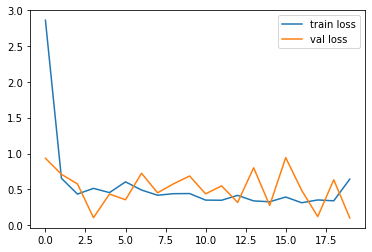

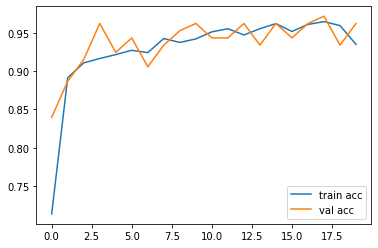

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('cotton_model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:

y_pred

array([[2.64600751e-32, 2.79768309e-11, 4.04625750e-31, 1.00000000e+00],
       [0.00000000e+00, 8.91888932e-15, 4.83235511e-35, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.28780387e-28],
       [1.41746582e-35, 1.00000000e+00, 4.45439005e-35, 4.59156680e-34],
       [5.22816106e-24, 1.27224129e-22, 1.00000000e+00, 1.97583897e-28],
       [1.00000000e+00, 4.35664724e-37, 3.21575721e-25, 2.16105132e-24],
       [8.58306585e-16, 1.13703372e-13, 1.00000000e+00, 8.70707640e-13],
       [4.31823882e-17, 2.14019958e-29, 1.00000000e+00, 2.89324076e-09],
       [7.68943044e-18, 4.18771890e-29, 1.00000000e+00, 1.80934148e-25],
       [1.06401429e-32, 1.00000000e+00, 1.05016696e-32, 3.68776141e-22],
       [2.57128719e-26, 7.28190089e-18, 2.93818443e-25, 1.00000000e+00],
       [9.99999881e-01, 1.55114549e-07, 1.37204497e-24, 1.36481820e-12],
       [6.53630973e-15, 1.00000000e+00, 3.10816801e-22, 9.31022193e-16],
       [2.28722760e-35, 2.49633752e-24, 7.95852432e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 3, 1, 1, 2, 0, 2, 2, 2, 1, 3, 0, 1, 3, 0, 1, 2, 2, 0, 1, 2, 0,
       3, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 3, 1, 3, 3, 3,
       1, 3, 0, 3, 1, 1, 2, 2, 3, 2, 1, 0, 2, 0, 3, 3, 1, 2, 1, 3, 2, 0,
       3, 0, 3, 3, 0, 1, 1, 3, 0, 3, 3, 0, 0, 0, 3, 1, 2, 1, 1, 0, 0, 2,
       2, 3, 0, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0])